# Problem 2

Use this notebook to write your code for problem 2b. Some code snippets from the notebook used in Recitation 1 may be useful to you as examples for using numpy and scikit-learn.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

%matplotlib inline

In [36]:
d = [1,2,6,12]
N = np.linspace(20,100,17)

original_dataset = np.loadtxt('data/bv_data.csv', delimiter=',',skiprows=1)


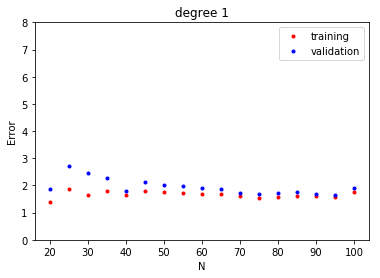

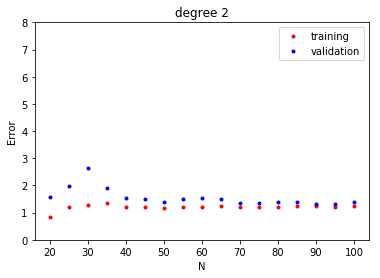

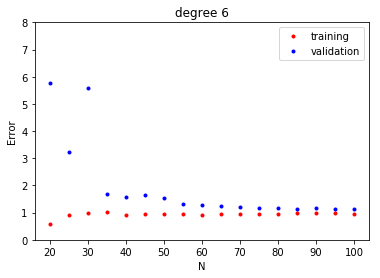

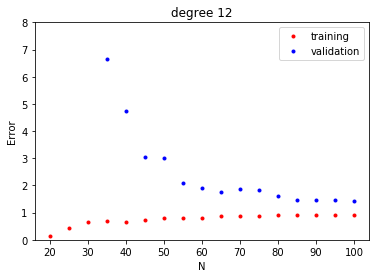

In [85]:
for d_val in d:
    plt.figure(d_val)
    legend_check = 0
    for N_val in N:
        dataset = original_dataset[:int(N_val)]
        kf = KFold(n_splits=5)
        kf.get_n_splits(dataset)
        
        KFold(n_splits=5, random_state=None, shuffle=False)
        x = dataset[:,0]
        y = dataset[:,1]
        train_err_avg = 0
        val_err_avg = 0
        for train_index, test_index in kf.split(x):
            x_train, x_val = x[train_index], x[test_index]
            y_train, y_val = y[train_index], y[test_index]      

            vals = np.polyfit(x_train, y_train, d_val)
            # Compute loss.
            train_err = np.mean((np.polyval(vals, x_train) - y_train) ** 2)
            train_err_avg += train_err
            val_err = np.mean((np.polyval(vals, x_val) - y_val) ** 2)
            val_err_avg += val_err
        train_err_avg = train_err_avg / 5.0
        val_err_avg = val_err_avg / 5.0
        if legend_check == 0:
            plt.plot(N_val, train_err_avg, '.r', label = 'training')
            plt.plot(N_val, val_err_avg, '.b', label = 'validation')
            legend_check = 1
        else:
            plt.plot(N_val, train_err_avg, '.r')
            plt.plot(N_val, val_err_avg, '.b')
        plt.ylim((0, 8))
        plt.title('degree ' + str(d_val))
        plt.xlabel('N')
        plt.ylabel('Error')
        plt.legend()

        
            